In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing data from link
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


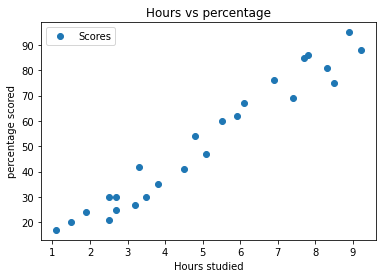

In [5]:
#plotting the distribution of scores
data.plot(x="Hours",y='Scores',style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('percentage scored')
plt.show()

In [6]:
x=data.iloc[:,:-1].values #all values of number of hours
y=data.iloc[:, 1].values #all values of scores

In [7]:
#we have split our data into training and testing sets, and now finally the time to train our algorithm
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
#training simple linear regression model on sample training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print("Training completed")


Training completed


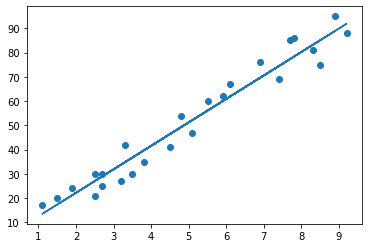

In [10]:
#plot the regression line on whole dataset
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [11]:
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [13]:
#predicting the test set result
y_pred=regressor.predict(x_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


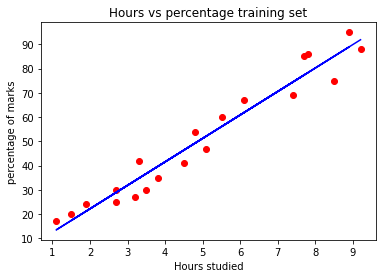

In [15]:
#visualizing the training set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("Hours vs percentage training set")
plt.xlabel("Hours studied")
plt.ylabel("percentage of marks")
plt.show()

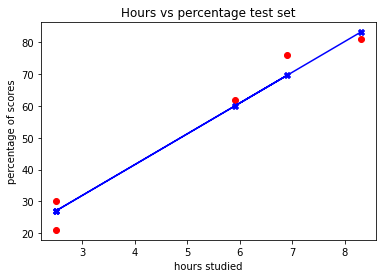

In [17]:
#visualizing the test set results
pp=regressor.predict(x_test)
plt.scatter(x_test,y_test,color='red',marker='o')
plt.scatter(x_test,pp,color='blue',marker='X')
plt.plot(x_test,pp,color='blue')
plt.title("Hours vs percentage test set")
plt.xlabel("hours studied")
plt.ylabel("percentage of scores")
plt.show()


In [18]:
#comparing actual values with predicted ones
df=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [19]:
#predicting the scores if student studies for 9.25 hrs/day
hours=[[9.25]]
own_pred=regressor.predict(hours)
print("No. of hours={}".format(hours))
print("Predicted score={}".format(own_pred[0]))


No. of hours=[[9.25]]
Predicted score=92.38611528261494


In [22]:
#finding out the error
from sklearn import metrics
print("Mean absolute error:", metrics.mean_absolute_error(y_test,y_pred))


Mean absolute error: 3.9207511902099244


C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

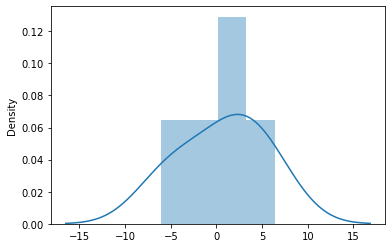

In [23]:
#Histogram of the residuals
#Normally distributed curves shows that its a good model
sns.distplot((y_test-y_pred),bins=4)
